Part 1: DT **Basics**

1.**Basic description of the data**
1. An overview of the data Features from breast cancer biopsies have been retrieved and added to the dataset. The majority of these attributes are measurements derived from digital pictures of breast mass fine needle aspirates (FNA).

Among the attributes are:


radius_mean: The average of the distances between the center and the outermost points. texture_mean: Grayscale values' standard deviation. perimeter_mean: The central tumor's average size. area_mean: The tumor's mean area. smoothness_mean: Local fluctuation in radius lengths averaged throughout time. compactness_mean = area - 1.0 / perimeter^2. concavity_mean: The contour's mean degree of concavity. concave_points_mean: The average number of the contour's concave sections. symmetry_mean: The tumor's mean symmetry. The "coastline approximation" mean is -1 in fractal_dimension_mean.


2. Using the features that were extracted, the classification job is to determine if a breast lump is malignant (cancerous) or benign (non-cancerous). In medical diagnosis, this work is essential since early identification of malignant tumors can greatly enhance the prognosis of patients.

 For this data, a decision tree is a reasonable model to attempt because:

Interpretability: Decision trees offer lucid insights into the decision-making process, which is crucial in medical applications where comprehension of the rationale for forecasts is imperative.
Decision trees are capable of processing both category and numerical data: Given the numerical features in the dataset, decision trees are a good option.
Decision trees can withstand features that are not relevant. When dealing with datasets that have a large number of characteristics, they can automatically choose the most pertinent aspects for decision-making.


3.Summary Visualization of the Data:

A pair plot, also known as a scatter plot matrix, is a popular data visualization that shows the pairwise connections between several dataset elements. Plots of this kind make it easier to see how different features are distributed as well as any possible correlations or patterns between feature pairs.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
import pandas as pd
from zipfile import ZipFile


column_names = ['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
                'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
                'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
                'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
                'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
                'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


with ZipFile('/content/breast+cancer+wisconsin+diagnostic.zip', 'r') as zip_ref:

    data_file = 'wdbc.data'
    with zip_ref.open(data_file) as file:

        data = pd.read_csv(file, header=None, names=column_names)


print(data.head())


         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [3]:
X = data[['texture_mean', 'radius_mean']]
y = data['Diagnosis']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [5]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
y_pred = clf.predict(X_test)

In [7]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           B       0.87      0.86      0.86       187
           M       0.74      0.77      0.75        98

    accuracy                           0.82       285
   macro avg       0.80      0.81      0.81       285
weighted avg       0.83      0.82      0.83       285



To inspect the decision tree model and visualize the results, we can use the plot_tree function

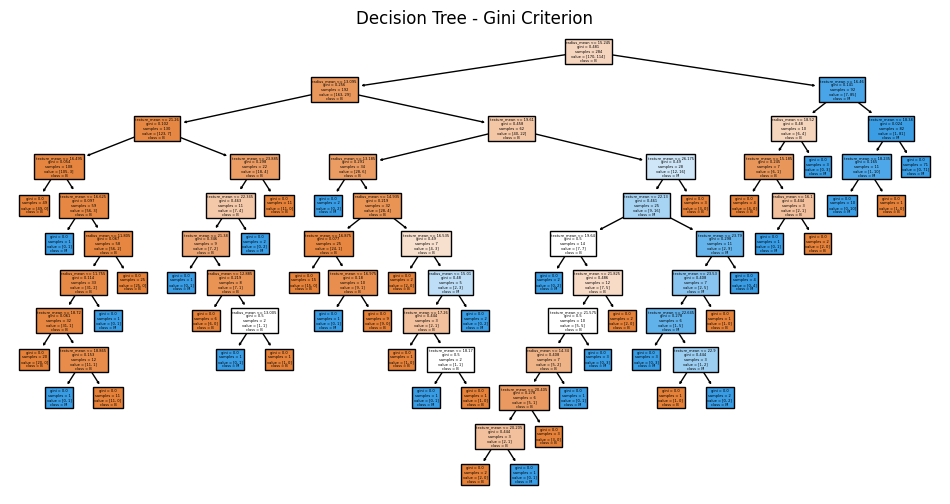

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=['texture_mean', 'radius_mean'], class_names=clf.classes_, filled=True)
plt.title("Decision Tree - Gini Criterion")
plt.show()


Repeating the process using the entropy criterion.

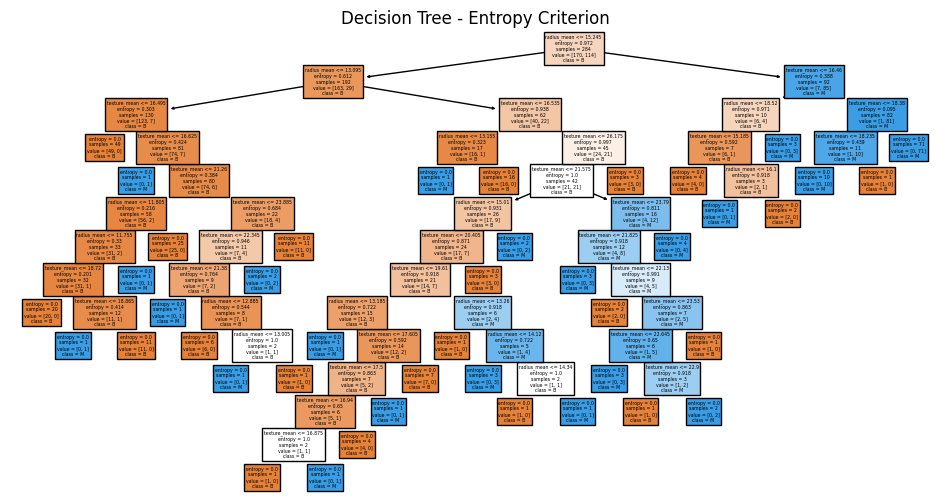

In [9]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(clf_entropy, feature_names=['texture_mean', 'radius_mean'], class_names=clf_entropy.classes_, filled=True)
plt.title("Decision Tree - Entropy Criterion")
plt.show()


7.Does using the entropy criterion make a big
difference or small difference in the overall classifier?

Yes

Part 2: DT **parameters**

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

max_depth_values = [3, 6, 10]

accuracy_scores = []
precision_scores = []
recall_scores = []

for max_depth in max_depth_values:

    clf_max_depth = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf_max_depth.fit(X_train, y_train)


    y_pred_max_depth = clf_max_depth.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred_max_depth)
    precision = precision_score(y_test, y_pred_max_depth, pos_label='M')
    recall = recall_score(y_test, y_pred_max_depth, pos_label='M')


    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

results_df = pd.DataFrame({
    'Max_Depth': max_depth_values,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
})

print(results_df)


   Max_Depth  Accuracy  Precision    Recall
0          3  0.887719   0.830000  0.846939
1          6  0.828070   0.769231  0.714286
2         10  0.821053   0.737374  0.744898


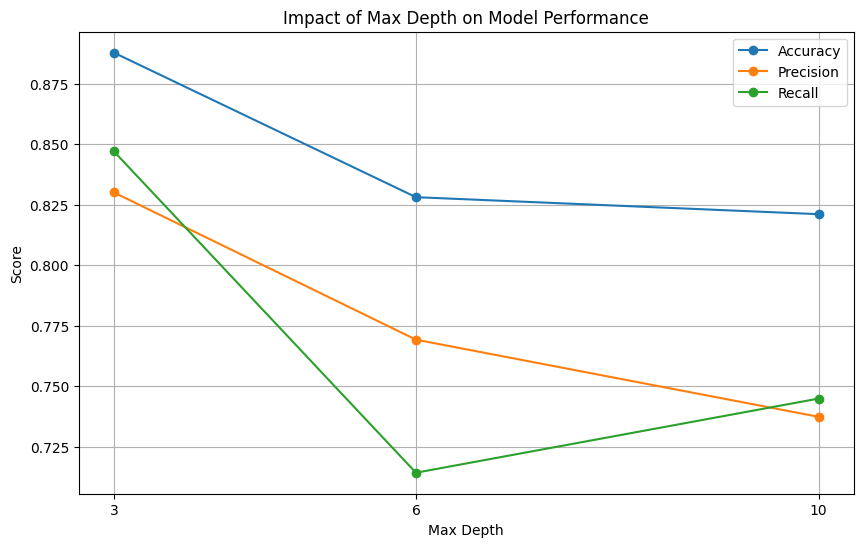

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(results_df['Max_Depth'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['Max_Depth'], results_df['Precision'], marker='o', label='Precision')
plt.plot(results_df['Max_Depth'], results_df['Recall'], marker='o', label='Recall')

plt.title('Impact of Max Depth on Model Performance')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()


Part 3: Test and Train Sizes

In [12]:
import numpy as np

In [13]:
max_depth = 6

In [14]:
train_percentages = np.arange(0.2, 0.9, 0.1)

In [15]:
train_pct_list = []
n_train_samples_list = []
n_test_samples_list = []
train_acc_list = []
test_acc_list = []

In [16]:
for train_percentage in train_percentages:

    n_train_samples = int(len(X) * train_percentage)
    n_test_samples = len(X) - n_train_samples


    X_train_partial, _, y_train_partial, _ = train_test_split(X, y, train_size=train_percentage, random_state=42)
    X_test_partial, y_test_partial = X_test, y_test


    clf_partial = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf_partial.fit(X_train_partial, y_train_partial)


    train_acc = clf_partial.score(X_train_partial, y_train_partial)


    test_acc = clf_partial.score(X_test_partial, y_test_partial)


    train_pct_list.append(train_percentage)
    n_train_samples_list.append(n_train_samples)
    n_test_samples_list.append(n_test_samples)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    results_df = pd.DataFrame({
    'train_pct': train_pct_list,
    'n_train_samples': n_train_samples_list,
    'n_test_samples': n_test_samples_list,
    'train_acc': train_acc_list,
    'test_acc': test_acc_list
})

print(results_df)


   train_pct  n_train_samples  n_test_samples  train_acc  test_acc
0        0.2              113             456   1.000000  0.817544
1        0.3              170             399   0.958824  0.824561
2        0.4              227             342   0.947137  0.828070
3        0.5              284             285   0.954225  0.828070
4        0.6              341             228   0.953079  0.877193
5        0.7              398             171   0.949749  0.894737
6        0.8              455             114   0.956044  0.912281


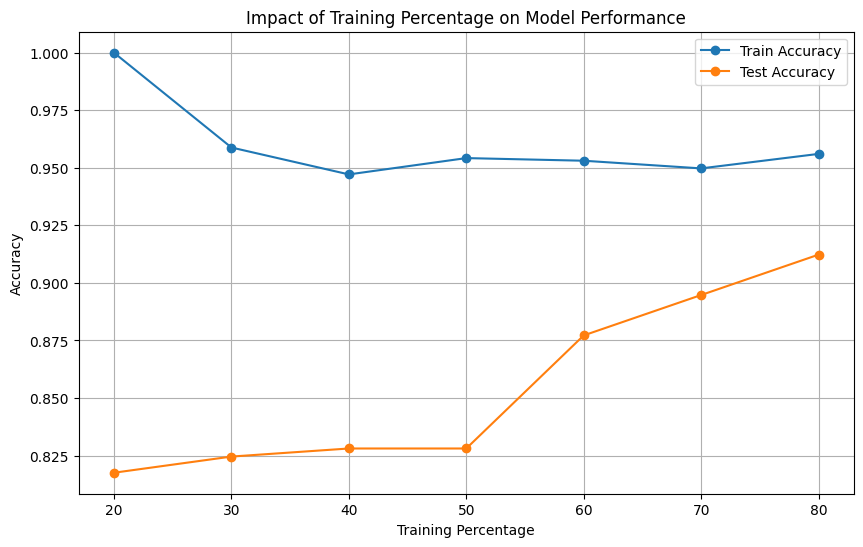

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

plt.plot(results_df['train_pct'] * 100, results_df['train_acc'], marker='o', label='Train Accuracy')
plt.plot(results_df['train_pct'] * 100, results_df['test_acc'], marker='o', label='Test Accuracy')

plt.title('Impact of Training Percentage on Model Performance')
plt.xlabel('Training Percentage')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


What is the best test/train split. Why?

It looks that using between 40% and 60% of the training data is the ideal test/train split. This range finds a happy medium between preventing overfitting and providing the model with sufficient data to learn from. Above this threshold, the likelihood of overfitting increases and test accuracy declines. As a result, the dataset and model complexity determine the ideal split.